In [1]:
%matplotlib inline
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from pprint import pprint

In [2]:
df_IR_mortgage_thirty = pd.read_csv('MORTGAGE30US.csv')
df_IR_mortgage_thirty.head()

,DATE,VALUE
0,1971-04-02,7.33
1,1971-04-09,7.31
2,1971-04-16,7.31
3,1971-04-23,7.31
4,1971-04-30,7.29


In [3]:
# Grab only data from 2013 onwards
df_IR_mortgage_thirty = df_IR_mortgage_thirty.truncate(before=2188, after=2478)

# Remove day from data to allow groupby
df_IR_mortgage_thirty['DATE'] = df_IR_mortgage_thirty['DATE'].str[:-3]

In [4]:
# Group by date, this way you can grab the 
# timepoints the group has agreed on

df_mortgage_gb_month = df_IR_mortgage_thirty.groupby(['DATE'])
grouped_mortgage_month = df_mortgage_gb_month.mean()
grouped_mortgage_month.reset_index()

,DATE,VALUE
0,2013-03,3.5650
1,2013-04,3.4450
2,2013-05,3.5360
3,2013-06,4.0700
4,2013-07,4.3700
5,2013-08,4.4560
6,2013-09,4.4900
7,2013-10,4.1920
8,2013-11,4.2550
9,2013-12,4.4575


In [5]:
grouped_mortgage_month = grouped_mortgage_month.iloc[::3,:]
grouped_mortgage_month.reset_index()

,DATE,VALUE
0,2013-03,3.5650
1,2013-06,4.0700
2,2013-09,4.4900
3,2013-12,4.4575
4,2014-03,4.3425
5,2014-06,4.1625
6,2014-09,4.1625
7,2014-12,3.8640
8,2015-03,3.7700
9,2015-06,3.9825


In [6]:
%store -r

# Show the Austin Median Income

In [7]:
df_AustinMedianIncome

,year,income
0,2013-03,61192.850000
1,2013-06,61722.400000
2,2013-09,61574.530000
3,2014-03,62657.830000
4,2014-06,63625.290000
5,2014-09,64792.600000
6,2015-03,66331.920000
7,2015-06,66712.460000
8,2015-09,67443.320000
9,2016-03,69529.540000


# Show the National Median Income

In [8]:
df_National_Median_Income

,year,income
0,2013-03,52244.570000
1,2013-06,52371.660000
2,2013-09,52055.650000
3,2014-03,52771.680000
4,2014-06,53340.510000
5,2014-09,53983.380000
6,2015-03,55010.420000
7,2015-06,55485.000000
8,2015-09,55977.250000
9,2016-03,57002.410000


In [19]:
df_md_list_price = pd.read_csv('Zillow CSV Files/City_MedianListingPrice_AllHomes.csv')
df_aus_list_price = df_md_list_price.loc[
    (df_md_list_price["RegionName"] == "Austin") & 
    (df_md_list_price["State"] == "TX"), :]
df_aus_list_price = df_aus_list_price.loc[:, '2013-03'::3]
df_aus_list_price = df_aus_list_price.transpose()
df_aus_lp_plot = df_aus_list_price.reset_index()

df_aus_lp_plot.rename(
    index=str,
    columns={11:'Austin Median List Price',
             'index': 'year'},
    inplace=True)
df_aus_lp_plot


,year,Austin Median List Price
0,2013-03,275000.0
1,2013-06,289000.0
2,2013-09,289000.0
3,2013-12,299000.0
4,2014-03,331990.0
5,2014-06,350000.0
6,2014-09,345000.0
7,2014-12,349687.5
8,2015-03,359000.0
9,2015-06,369900.0


In [40]:
austin_houses = df_aus_lp_plot['Austin Median List Price']
df_incomes = pd.merge(df_AustinMedianIncome, df_National_Median_Income, on='year')
df_incomes = df_incomes.rename(columns={'income_x': 'Austin Median Income', 'income_y': 'National Median Income'})
df_summary = pd.merge(df_incomes, df_aus_lp_plot, on='year')
df_summary['Expected Mortgage Payment'] = df_summary['Austin Median List Price'] * .8 / 360 * 1.01973 * 1.0464 * 1.00473
df_summary['Desired Maximum Mortgage Payment'] = df_summary['Austin Median Income'] / 12 * .3
df_summary

,year,Austin Median Income,National Median Income,Austin Median List Price,Expected Mortgage Payment,Desired Maximum Mortgage Payment
0,2013-03,61192.850000,52244.570000,275000.0,655.167698,1529.821250
1,2013-06,61722.400000,52371.660000,289000.0,688.521690,1543.060000
2,2013-09,61574.530000,52055.650000,289000.0,688.521690,1539.363250
3,2014-03,62657.830000,52771.680000,331990.0,790.942270,1566.445750
4,2014-06,63625.290000,53340.510000,350000.0,833.849798,1590.632250
5,2014-09,64792.600000,53983.380000,345000.0,821.937658,1619.815000
6,2015-03,66331.920000,55010.420000,359000.0,855.291650,1658.298000
7,2015-06,66712.460000,55485.000000,369900.0,881.260115,1667.811500
8,2015-09,67443.320000,55977.250000,360900.0,859.818263,1686.083000
9,2016-03,69529.540000,57002.410000,371990.0,886.239389,1738.238500


# Transform both dataframes
* Transform the household income dataframes by multiplying the median household income by 0.3, and then dividing by 12.
* This will allow us to compare directly between the median household income and the monthly mortgage payments.
* In THEORY, monthly mortgage payments SHOULD be higher than the transformed median household income, proving that Austin is not affordable

# Show the Austin Household Sale Price

In [ ]:
df_Austin_SalePrice

# Show the National Household Sale Price

In [ ]:
y_aus_notax

# Transform both dataframes
* This is where it gets tricky. Both dataframes have the correct timepoints, but you need to transform this one a little differently:
    * Assume a 20% down payment. So first, multiply that month's sale price by 80% to get the loan amount. 
    * Next, grab the interest rate for that month and divide by 12. This'll give you the monthly interest rate for that month. This makes sense, because we're assuming houses bought for that specific month will have a 30-year, fixed interest rate. 
    * Divide that monthly interest rate by (1 - (1 + monthly_IR ** -360)). Then, multiply the loan amount with this quotient. Do that for the whole table, and you have your transformed dataset


# Plot Austin transformed median household income v. monthly mortgage payments

# Plot national transformed median household income v. monthly mortgage payments

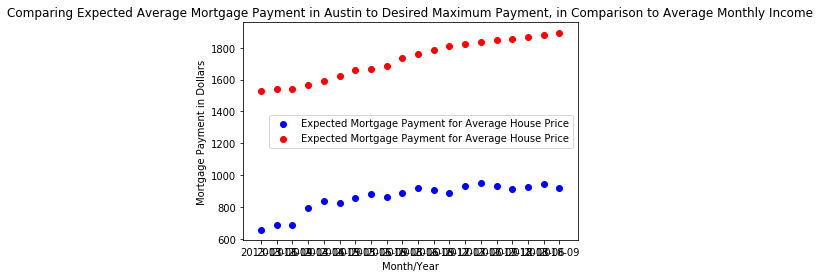

In [44]:
plt.scatter(df_summary['year'], df_summary['Expected Mortgage Payment'], color='blue', label='Expected Mortgage Payment for Average House Price')
plt.scatter(df_summary['year'], df_summary['Desired Maximum Mortgage Payment'], color='red', label='Expected Mortgage Payment for Average House Price')
plt.title('Comparing Expected Average Mortgage Payment in Austin to Desired Maximum Payment, in Comparison to Average Monthly Income')
plt.xlabel('Month/Year')
plt.ylabel('Mortgage Payment in Dollars')
plt.legend(loc='best')
plt.figsize
plt.show()